In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('survey_results_public.csv')

## What undergraduate major can better help you become a developer?

In [12]:
data['UndergradMajor'].value_counts()/data[-data['UndergradMajor'].isna()].shape[0] * 100

Computer science, computer engineering, or software engineering                   61.931562
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.322483
Information systems, information technology, or system administration              7.983136
A natural science (such as biology, chemistry, physics, etc.)                      4.323953
Mathematics or statistics                                                          3.625846
Web development or web design                                                      3.508187
A business discipline (such as accounting, finance, marketing, etc.)               2.696343
A humanities discipline (such as literature, history, philosophy, etc.)            1.974703
A social science (such as anthropology, psychology, political science, etc.)       1.829591
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.421708
I never declared a major                                                        

Out of all respondents who provided their undergraduate major information, almost 62% of them had their undergraduate major in 'computer science, computer engineering or software engineering'. Only about 9% of people came from 'Another enigneering discipline' which ranked No.2 -- 53% less than No.1. There are two possible reasons: first, many people clearly knew their interest in becoming a developer and then chose computer science as their major; second, computer science is such a specialized field that require a lot of training, which makes it difficult for people coming from other domains. So, if you have already made up your mind to become a developer, choosing a major such as computer science will never be a bad decision.

Besides the survey results, I would be curious to know the number of computer science courses taken by each person, especially those who came from a non-cs major. Moreover, I would like to check the distribution of undergraduate majors in finance or marketing field. The distributions in these domains should be more balanced.

## When did most people code for the first time?

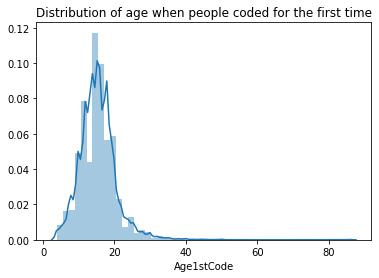

In [36]:
sns.distplot(data['Age1stCode'].replace({'Younger than 5 years':4,'Older than 85':86})).set_title('Distribution of age when people coded for the first time');

To make such a plot, I firstly dealt with those people who responded 'Younger than 5 years' and 'Older than 85'. I simply replaced them with 4 and 86 because these people are only a few outliers anyway and not our focus. From the distribution plot above, we can see that most people coded for the first time between 10 and 20. This makes sense because that is the time when most people went to high school and college.

## What is/will be the most popular programming language?

In [76]:
desire = dict()
for index,row in data[-data['LanguageDesireNextYear'].isna()].iterrows():
    for language in row['LanguageDesireNextYear'].split(';'):
        if language not in desire.keys():
            desire[language] = 0
        else:
            desire[language] += 1

In [77]:
desire

{'C#': 13673,
 'HTML/CSS': 20770,
 'JavaScript': 26187,
 'Python': 26681,
 'Swift': 5642,
 'Objective-C': 1524,
 'Java': 13263,
 'Ruby': 4183,
 'Scala': 3464,
 'PHP': 7105,
 'Rust': 10562,
 'R': 4270,
 'SQL': 19969,
 'Go': 12604,
 'TypeScript': 17149,
 'Assembly': 2468,
 'Bash/Shell/PowerShell': 11727,
 'C': 6090,
 'Haskell': 2995,
 'Perl': 1149,
 'C++': 9755,
 'Julia': 1660,
 'Kotlin': 9574,
 'Dart': 4741,
 'VBA': 1054}

In [83]:
sorted(desire.items(), key=lambda kv: kv[1], reverse=True)

[('Python', 26681),
 ('JavaScript', 26187),
 ('HTML/CSS', 20770),
 ('SQL', 19969),
 ('TypeScript', 17149),
 ('C#', 13673),
 ('Java', 13263),
 ('Go', 12604),
 ('Bash/Shell/PowerShell', 11727),
 ('Rust', 10562),
 ('C++', 9755),
 ('Kotlin', 9574),
 ('PHP', 7105),
 ('C', 6090),
 ('Swift', 5642),
 ('Dart', 4741),
 ('R', 4270),
 ('Ruby', 4183),
 ('Scala', 3464),
 ('Haskell', 2995),
 ('Assembly', 2468),
 ('Julia', 1660),
 ('Objective-C', 1524),
 ('Perl', 1149),
 ('VBA', 1054)]

In [78]:
worked = dict()
for index,row in data[-data['LanguageWorkedWith'].isna()].iterrows():
    for language in row['LanguageWorkedWith'].split(';'):
        if language not in worked.keys():
            worked[language] = 0
        else:
            worked[language] += 1

In [79]:
worked

{'C#': 18040,
 'HTML/CSS': 36180,
 'JavaScript': 38821,
 'Swift': 3396,
 'Objective-C': 2339,
 'Python': 25286,
 'Ruby': 4045,
 'SQL': 31412,
 'Java': 23073,
 'PHP': 15006,
 'C': 12486,
 'TypeScript': 14577,
 'Bash/Shell/PowerShell': 18979,
 'Kotlin': 4467,
 'R': 3287,
 'VBA': 3498,
 'Perl': 1795,
 'Scala': 2051,
 'C++': 13706,
 'Go': 5037,
 'Haskell': 1221,
 'Rust': 2928,
 'Dart': 2279,
 'Julia': 518,
 'Assembly': 3552}

In [82]:
sorted(worked.items(), key=lambda kv: kv[1], reverse=True)

[('JavaScript', 38821),
 ('HTML/CSS', 36180),
 ('SQL', 31412),
 ('Python', 25286),
 ('Java', 23073),
 ('Bash/Shell/PowerShell', 18979),
 ('C#', 18040),
 ('PHP', 15006),
 ('TypeScript', 14577),
 ('C++', 13706),
 ('C', 12486),
 ('Go', 5037),
 ('Kotlin', 4467),
 ('Ruby', 4045),
 ('Assembly', 3552),
 ('VBA', 3498),
 ('Swift', 3396),
 ('R', 3287),
 ('Rust', 2928),
 ('Objective-C', 2339),
 ('Dart', 2279),
 ('Scala', 2051),
 ('Perl', 1795),
 ('Haskell', 1221),
 ('Julia', 518)]

I created two dictionaries here and sort them by values in a descending order. Keys are different programming languages and values are the number of responses mentioning this language. Python, JavaScript, HTML/CSS and SQL are the top 4 in both dictionaries! This is not surprising because I know these four languages even though I officially started coding last year. One thing to note here is Python is the only language that has higher value in the first dictionary than the second dictionary within top 4. The difference between these two dictionaries is the number of people who didn't use this language but desire to learn - the number of people who used this language but would stop using it. 
